# CORONAVIRUS AND ITS EFFECT ON AIR POLLUTION IN INDIA


Importing librarys

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading the datasets

In [0]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [0]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [0]:
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

Cheking heads

In [6]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74


In [7]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,314,327,345,356,385,394,403,410,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1047,1099,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,235,248,282,309,333,344,344,344,385,398,423,468,468,472,493,499,514,521,526,537,545,550,550,568,576,596,604,615,617,624,628,639,639,652,653,653,663,676,676,681
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6,7,7,11,11,11,11,11,11,11,11,13,13,13,13,14,14,17,17,17,17,17,17,17,17,18,18,18,18,18,18


In [8]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4


In [0]:
dates = list(confirmed.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

In [0]:
df1 = confirmed.groupby('Country/Region').sum().reset_index()
df2 = deaths.groupby('Country/Region').sum().reset_index()
df3 = recovered.groupby('Country/Region').sum().reset_index()

Confining to India

In [0]:
k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0]

Plotting the scenario in India

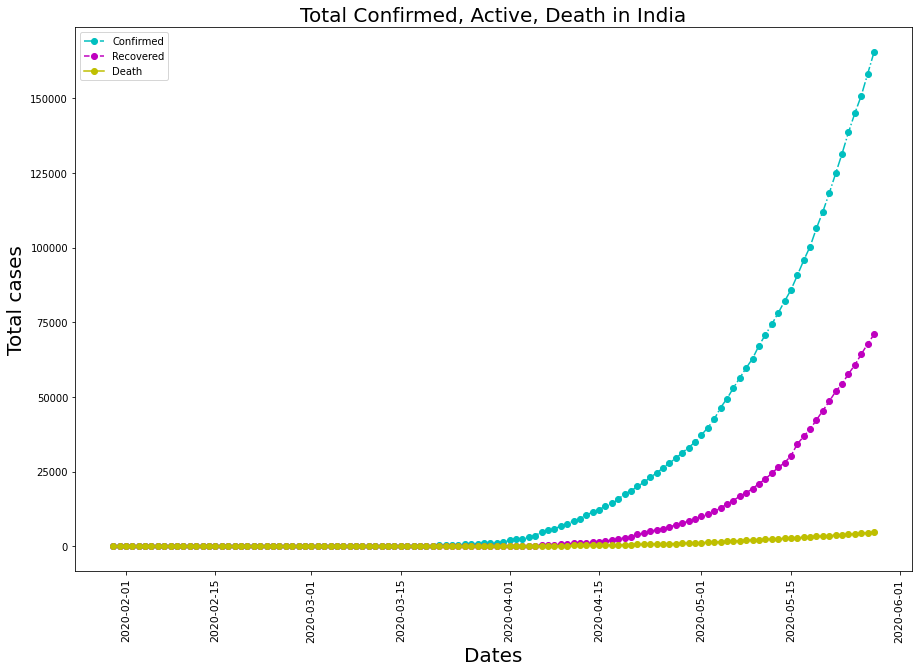

In [15]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)
ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-.',color = 'c')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='--',color = 'm')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'y')
plt.legend();

Where does India stand among the others?

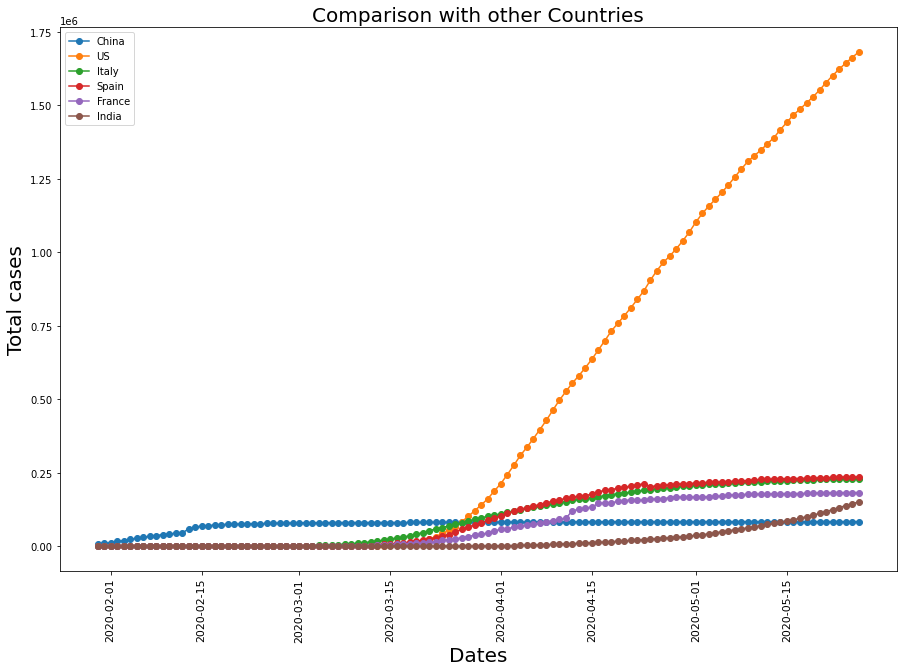

In [0]:
countries = ['China','US', 'Italy', 'Spain', 'France','India']

global_confirmed = []
global_recovered = []
global_deaths = []
global_active = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0]) 

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0])  

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i],linestyle ='-')
plt.legend();

Finding the growth factor in india covid cases


In [0]:
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k =df1[df1['Country/Region']=='India'].loc[:,'2/4/20':]
india_confirmed = k.values.tolist()[0] 

growth_diff = []

for i in range(1,len(india_confirmed)):
    growth_diff.append(india_confirmed[i] / india_confirmed[i-1])

growth_factor = sum(growth_diff)/len(growth_diff)
print('Average growth factor',growth_factor)

Average growth factor 1.129914482388571


Lets predict with this growth factor for the coming 15 days

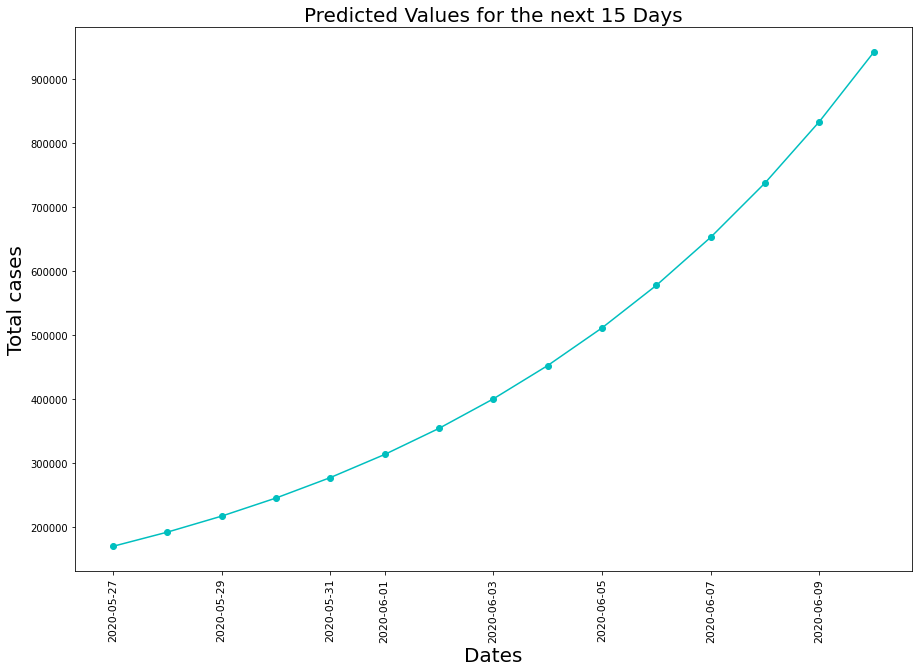

In [0]:
prediction_dates = []
start_date = dates_india[len(dates_india) - 1]
for i in range(15):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
previous_day_cases = global_confirmed[5][len(dates_india) - 1]
predicted_cases = []

for i in range(15):
    predicted_value = previous_day_cases *  growth_factor
    predicted_cases.append(predicted_value)
    previous_day_cases = predicted_value

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)
ax1 = plt.plot_date(y= predicted_cases,x= prediction_dates,linestyle ='-',color = 'c')


Prediction using Prophet Model 

In [0]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


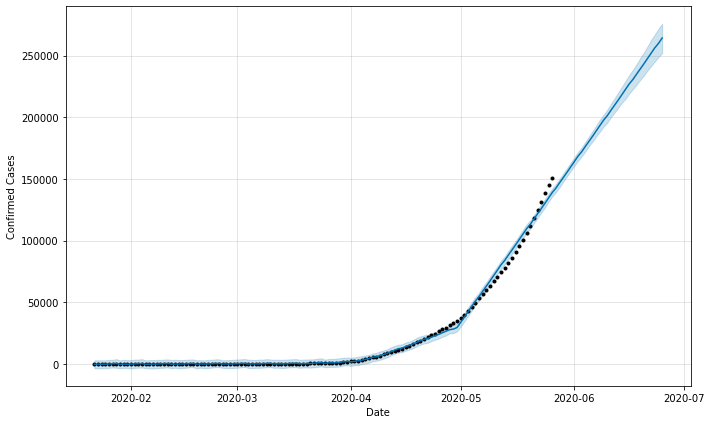

In [0]:
k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

prop=Prophet()
prop.fit(data)
future=prop.make_future_dataframe(periods=30)
prop_forecast=prop.predict(future)
forecast = prop_forecast[['ds','yhat']].tail(30)

fig = plot_plotly(prop, prop_forecast)
fig = prop.plot(prop_forecast,xlabel='Date',ylabel='Confirmed Cases')

Using XGB regressor

In [0]:
from xgboost import XGBRegressor

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [0]:
from sklearn.preprocessing import OrdinalEncoder

In [0]:
train['day'] = train['Date'].dt.day

In [0]:
train['month'] = train['Date'].dt.month
train['dayofweek'] = train['Date'].dt.dayofweek
train['dayofyear'] = train['Date'].dt.dayofyear
train['quarter'] = train['Date'].dt.quarter
train['weekofyear'] = train['Date'].dt.weekofyear
test['day'] = test['Date'].dt.day
test['month'] = test['Date'].dt.month
test['dayofweek'] = test['Date'].dt.dayofweek
test['dayofyear'] = test['Date'].dt.dayofyear
test['quarter'] = test['Date'].dt.quarter
test['weekofyear'] = test['Date'].dt.weekofyear
countries = list(train['Country_Region'].unique())
india_code = countries.index('India')
train = train.drop(['Date','Id'],1)
test =  test.drop(['Date'],1)

train.Province_State.fillna('NaN', inplace=True)
oe = OrdinalEncoder()
train[['Province_State','Country_Region']] = oe.fit_transform(train.loc[:,['Province_State','Country_Region']])

test.Province_State.fillna('NaN', inplace=True)
oe = OrdinalEncoder()
test[['Province_State','Country_Region']] = oe.fit_transform(test.loc[:,['Province_State','Country_Region']])

In [0]:
train.head()

,Province_State,Country_Region,ConfirmedCases,Fatalities,day,month,dayofweek,dayofyear,quarter,weekofyear
0,72.0,0.0,0.0,0.0,22,1,2,22,1,4
1,72.0,0.0,0.0,0.0,23,1,3,23,1,4
2,72.0,0.0,0.0,0.0,24,1,4,24,1,4
3,72.0,0.0,0.0,0.0,25,1,5,25,1,4
4,72.0,0.0,0.0,0.0,26,1,6,26,1,4


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
columns = ['day','month','dayofweek','dayofyear','quarter','weekofyear','Province_State', 'Country_Region','ConfirmedCases','Fatalities']
test_columns = ['day','month','dayofweek','dayofyear','quarter','weekofyear','Province_State','Country_Region']
train = train[columns]
x = train.drop(['Fatalities','ConfirmedCases'], 1)
y = train['ConfirmedCases']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
test = test[test_columns]
test_india = test[test['Country_Region'] == india_code]

In [0]:
models = []
mse = []
mae = []
rmse = []

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [0]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
xgb_forecast = xgb.predict(test_india)
models.append('XGBoost')
mse.append(round(mean_squared_error(pred, y_test),2))
mae.append(round(mean_absolute_error(pred, y_test),2))
rmse.append(round(np.sqrt(mean_squared_error(pred, y_test)),2))

[18:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


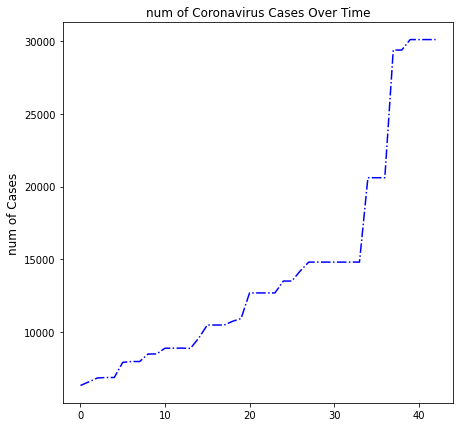

In [0]:
plt.figure(figsize=(7,7))
plt.plot(xgb_forecast,linestyle='dashdot', color='blue')
plt.title('num of Coronavirus Cases Over Time', size=12)
plt.ylabel('num of Cases', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [0]:
mse

[157416419.57]

In [0]:
rmse

[12546.57]

In [0]:
mae

[4134.78]

#Part 2
Effect on air pollution

Adding some more library's

In [0]:
import seaborn as sns
import datetime
import pandas as pd
import numpy as np

Loading pollution data

In [0]:
df = pd.read_csv("city_day.csv",parse_dates=True)

In [17]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [0]:
df['Date'] = pd.to_datetime(df['Date'])

Looking inside the data

In [19]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
std,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


Removing unused columns:

Here we will keep the columns 'City', 'Date', 'AQI' and 'AQI_Bucket'.

In [0]:
df=df[['City','Date','AQI','AQI_Bucket']]


Modifying dataset for our needs:

Here,we will tranform the data with the columns as the cities AQI so as to compare AQI between states. The table after transforming is given below.


In [0]:
cities=pd.unique(df['City'])
column1= cities+'_AQI'
column2=cities+'_AQI_Bucket'
columns=[*column1,*column2]

In [25]:
final_df=pd.DataFrame(index=np.arange('2015-01-01','2020-05-02',dtype='datetime64[D]'),columns=column1)
for city,i in zip(cities,final_df.columns):
    n=len(np.array(df[df['City']==city]['AQI']))
    final_df[i][-n:]=np.array(df[df['City']==city]['AQI'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


convert it into monthly data

In [0]:
final_df=final_df.astype('float64')
final_df=final_df.resample(rule='MS').mean()

In [28]:
final_df.tail()

,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Delhi_AQI,Ernakulam_AQI,Gurugram_AQI,Guwahati_AQI,Hyderabad_AQI,Jaipur_AQI,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI
2020-01-01,294.111111,NaN,88.032258,104.806452,95.322581,160.516129,155.518519,94.064516,87.516129,308.451613,136.857143,242.225806,291.645161,104.548387,112.451613,162.935484,156.111111,216.935484,272.645161,168.645161,262.838710,68.619048,301.413793,78.258065
2020-02-01,547.689655,NaN,67.103448,128.740741,96.482759,128.620690,136.370370,93.379310,78.137931,262.137931,96.172414,197.137931,266.620690,94.965517,125.241379,167.000000,121.068966,197.724138,216.655172,159.206897,201.206897,93.576923,192.321429,88.620690
2020-03-01,277.466667,65.350000,52.548387,83.733333,90.741935,109.714286,124.100000,55.419355,70.290323,135.838710,84.035714,122.032258,193.806452,78.741935,100.935484,163.166667,129.166667,122.838710,134.000000,104.645161,158.419355,67.870968,117.250000,74.741935
2020-04-01,120.733333,39.233333,44.400000,58.708333,68.533333,113.782609,137.923077,44.586207,63.500000,113.000000,70.100000,111.166667,127.833333,65.000000,86.200000,121.400000,77.033333,70.366667,106.733333,74.333333,131.166667,75.750000,132.137931,57.066667
2020-05-01,134.000000,20.000000,54.000000,109.000000,75.000000,121.000000,106.000000,59.000000,65.000000,144.000000,90.000000,164.000000,46.000000,71.000000,163.000000,110.000000,56.000000,69.000000,82.000000,64.000000,118.000000,NaN,101.000000,82.000000


Adding a column 'India_AQI' which gives us the average of all the cities data across a row

In [0]:
final_df['India_AQI']=final_df.mean(axis=1)

Plotting India's AQI over the years

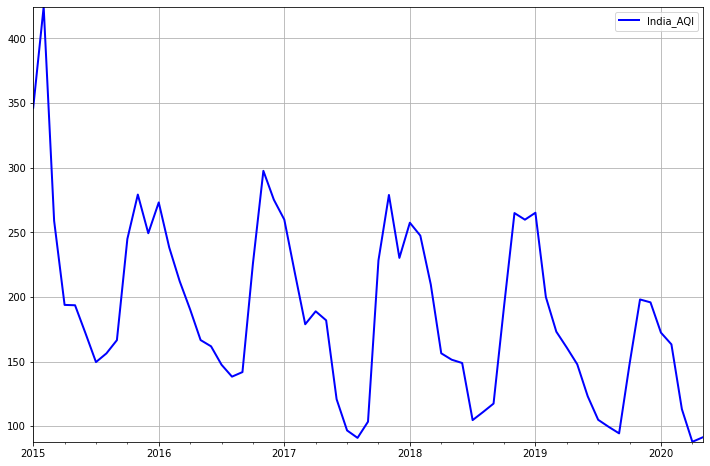

In [30]:
ax=final_df[['India_AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Blue')
ax.autoscale(enable=True, axis='both', tight=True)


Air pollution by city for the year 2019

Our aim of the section is to find level of pollution in the cities and compare them, we use the year 2019 as it is by far the most complete in terms of data and it is the most recent full year and hence rather apt to compare.

We will start with forming a table with the data from 2019.


In [31]:
df_2019=final_df['2019-01-01':'2020-01-01']
df_2019.head()

,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Delhi_AQI,Ernakulam_AQI,Gurugram_AQI,Guwahati_AQI,Hyderabad_AQI,Jaipur_AQI,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,India_AQI
2019-01-01,755.516129,NaN,218.612903,94.633333,116.806452,NaN,259.967742,NaN,131.000000,365.741935,NaN,291.419355,NaN,133.290323,150.290323,324.612903,NaN,360.838710,315.516129,165.516129,405.290323,NaN,289.400000,128.161290,265.094940
2019-02-01,560.535714,NaN,114.464286,94.892857,106.250000,NaN,208.259259,NaN,118.071429,258.178571,NaN,184.392857,168.545455,113.250000,118.714286,187.214286,NaN,266.071429,243.071429,149.821429,296.107143,NaN,322.555556,88.428571,199.934698
2019-03-01,601.741935,NaN,79.967742,99.733333,122.129032,NaN,186.870968,NaN,101.419355,197.354839,NaN,150.483871,223.290323,106.161290,106.774194,148.413793,NaN,157.774194,217.645161,123.483871,214.032258,NaN,189.888889,88.838710,173.111320
2019-04-01,633.518519,NaN,78.133333,112.000000,124.300000,NaN,190.562500,NaN,87.533333,219.400000,NaN,213.633333,105.933333,94.800000,151.000000,117.758621,NaN,86.800000,217.700000,98.066667,151.100000,NaN,142.160000,69.933333,160.796276
2019-05-01,412.769231,NaN,106.777778,113.258065,105.387097,NaN,130.464286,NaN,103.612903,235.838710,NaN,219.451613,110.896552,113.419355,142.161290,130.555556,NaN,88.548387,184.096774,87.870968,170.806452,NaN,130.413793,75.419355,147.874898


In [32]:
df_2019.isna().sum()

Ahmedabad_AQI              0
Aizawl_AQI                13
Amaravati_AQI              1
Amritsar_AQI               0
Bengaluru_AQI              0
Bhopal_AQI                 8
Brajrajnagar_AQI           0
Chandigarh_AQI             8
Chennai_AQI                0
Delhi_AQI                  0
Ernakulam_AQI             12
Gurugram_AQI               0
Guwahati_AQI               1
Hyderabad_AQI              0
Jaipur_AQI                 0
Jorapokhar_AQI             1
Kochi_AQI                 12
Kolkata_AQI                0
Lucknow_AQI                0
Mumbai_AQI                 0
Patna_AQI                  0
Shillong_AQI               8
Talcher_AQI                0
Thiruvananthapuram_AQI     0
India_AQI                  0
dtype: int64

3 cities whose data is missing in its entirety, so removing it

In [0]:
df_2019=df_2019.drop(['Aizawl_AQI','Ernakulam_AQI','Kochi_AQI'],axis=1)

Taking average of months

In [0]:
AQI_2019=df_2019.mean(axis=0)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

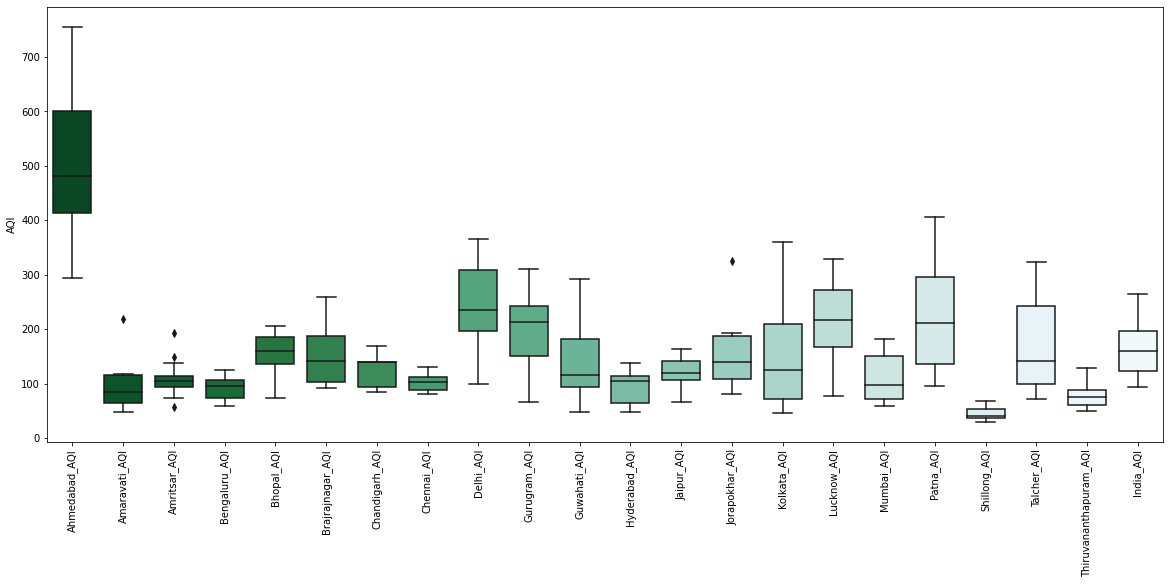

In [36]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
bplot = sns.boxplot( data=df_2019,  width=0.75,palette="BuGn_r")
plt.ylabel('AQI');

Ahmedebad has easily the highest values of AQI in the country, followed by Delhi

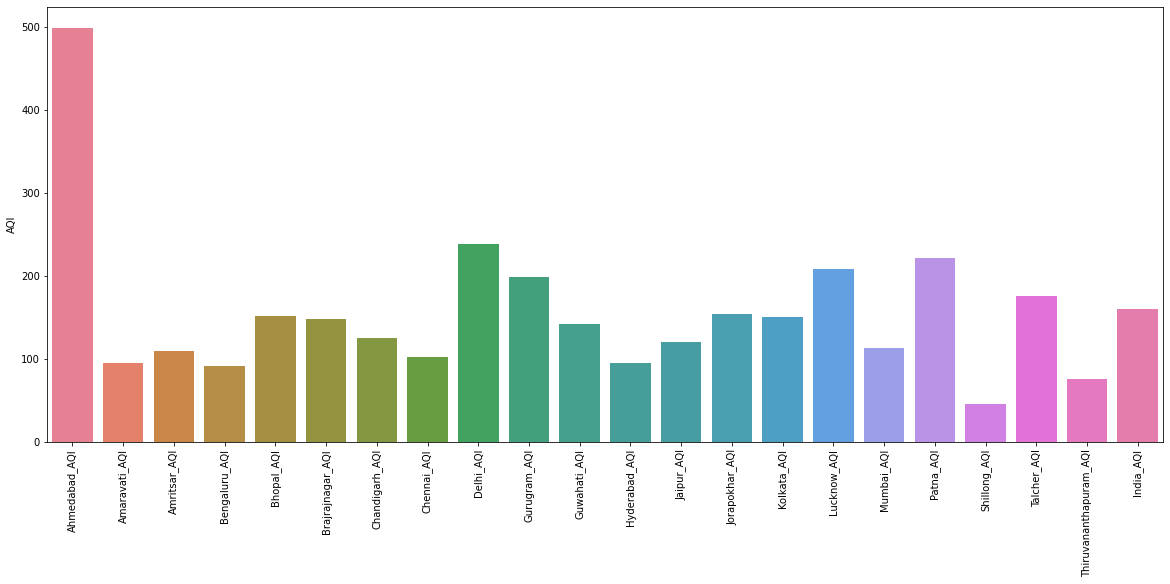

In [37]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.ylabel('AQI')
bplot=sns.barplot(AQI_2019.index, AQI_2019.values,palette="husl")

Shillong is the least followed by trivandrum

#Analysing and forecasting of AQI values:


Checking the seasonal decompose of the AQI values of india

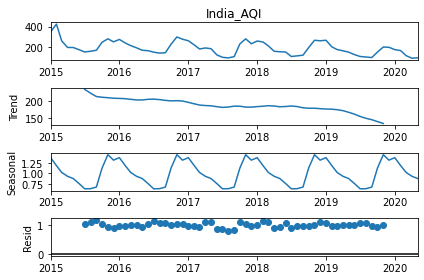

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
India_AQI=final_df['India_AQI']
result=seasonal_decompose(India_AQI,model='multiplicative')
result.plot();

Using sarima

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima;
from pmdarima import auto_arima;

In [0]:
auto_arima(y=India_AQI,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seas

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   65
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -314.846
Date:                            Wed, 27 May 2020   AIC                            641.691
Time:                                    18:45:39   BIC                            654.644
Sample:                                         0   HQIC                           646.794
                                             - 65                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.2162      0.792     -0.273      0.785      -1.769       1.337
ar.L1         -0.7919      0.120     -6.609      0.000      -1.027      -0.557
ma.L1          0.9998      3.377      0.296      0.767      -5.619       7.618
ar.S.L12       0.9563      0.076     12.624      0.000       0.808       1.105
ma.S.L12      -0.6662      0.278     -2.395      0.017      -1.211      -0.121
sigma2       907.2585   3026.658      0.300      0.764   -5024.882    6839.399
===================================================================================
Ljung-Box (Q):                       29.49   Jarque-Bera (JB):                22.21
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
len(India_AQI)

65

dividing into train and test:

In [0]:
train=India_AQI[:41]
test=India_AQI[42:54]

Forming the model:

In [0]:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          India_AQI   No. Observations:                   41
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -204.793
Date:                            Wed, 27 May 2020   AIC                            419.586
Time:                                    18:45:40   BIC                            428.030
Sample:                                01-01-2015   HQIC                           422.639
                                     - 05-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6708      0.203     -3.312      0.001      -1.068      -0.274
ma.L1          0.9996      5.867      0.170      0.865     -10.500      12.499
ar.S.L12       0.9310      0.266      3.505      0.000       0.410       1.452
ma.S.L12      -0.6350      0.693     -0.916      0.360      -1.994       0.724
sigma2      1297.9758   7426.082      0.175      0.861   -1.33e+04    1.59e+04
===================================================================================
Ljung-Box (Q):                       48.19   Jarque-Bera (JB):                12.74
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                            -0.66
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Obtaining predicted values:

In [0]:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')

Plotting predicted values against the true values:

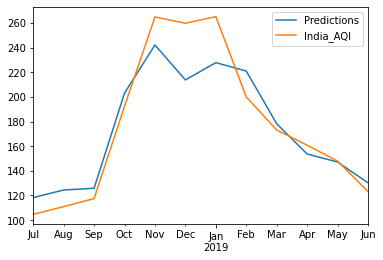

In [0]:
predictions.plot(legend=True)
test.plot(legend=True);

In [0]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean AQI',test.mean())

RMSE =  20.69607069599271
Mean AQI 176.68763588530942


Trying differnt parameters just to check

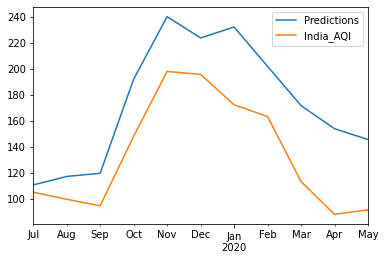

In [0]:
#dividing into train and test:
train=India_AQI[:53]
test=India_AQI[54:]
# Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=54, end=64, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True);

In [0]:
#Finding RMSE:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean AQI',test.mean())

RMSE =  43.95748314220997
Mean AQI 133.55768465497644


Predicting the future

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



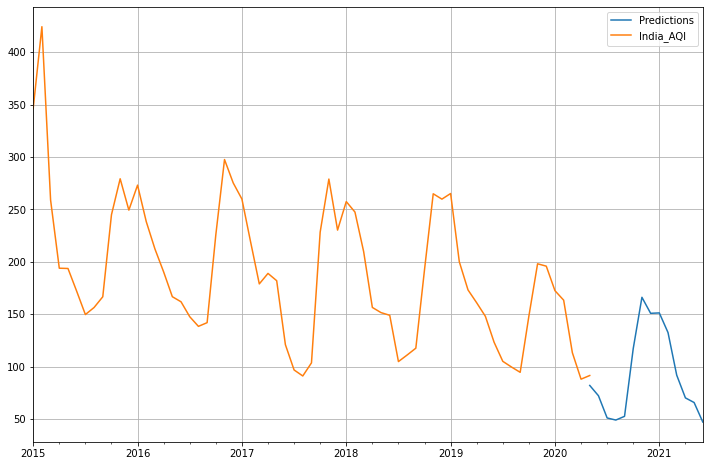

In [0]:
model=SARIMAX(India_AQI,order=(1,1,1),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
predictions.plot(legend=True)
India_AQI.plot(legend=True,figsize=(12,8),grid=True);

Forecasting using Facebook's Prophet.

In [0]:
from fbprophet import Prophet

In [0]:
#Formatting necessary to Prophet:
India_AQI=India_AQI.reset_index()
India_AQI.columns=['ds','y']

In [0]:
# Forming test/train data:
train=India_AQI[:-24]
test=India_AQI[-24:-12]
m = Prophet(seasonality_mode='multiplicative')
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=12,freq = 'MS')

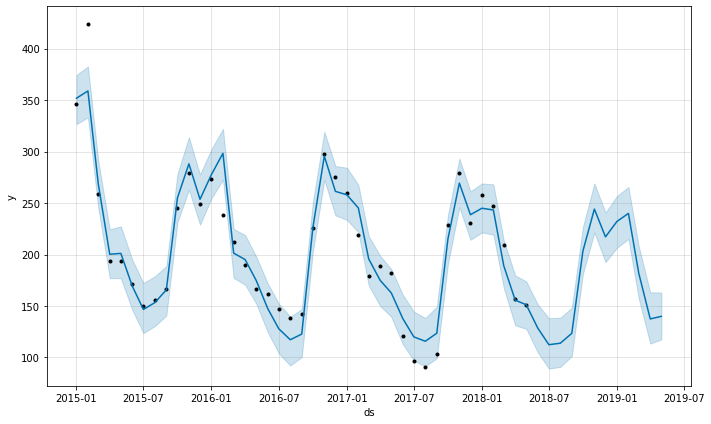

In [0]:
forecast = m.predict(future)
m.plot(forecast);

In [0]:
#Finding RMSE:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(forecast['yhat'][-12:],test['y']))
print('RMSE = ',RMSE)
print('Mean AQI',test['y'].mean())

RMSE =  22.814309479104242
Mean AQI 178.83105077960582


RMSE value is a lot higher than that of SARIMA

Lets forecast using prophet

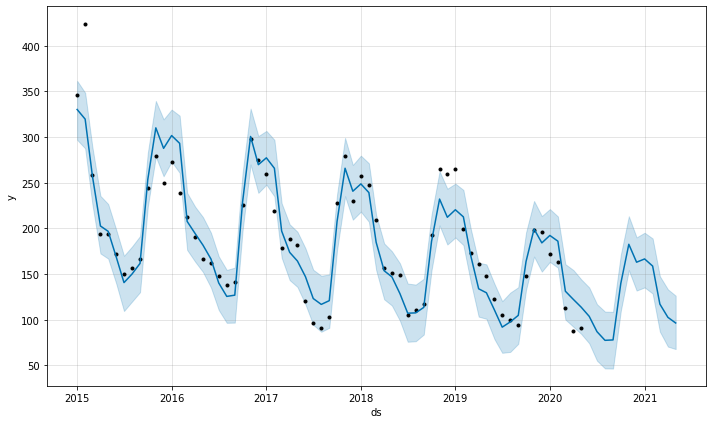

In [0]:
m = Prophet(seasonality_mode='multiplicative',weekly_seasonality=False,daily_seasonality=False)
m.fit(India_AQI)
future = m.make_future_dataframe(periods=12,freq = 'MS')
forecast = m.predict(future)
m.plot(forecast);

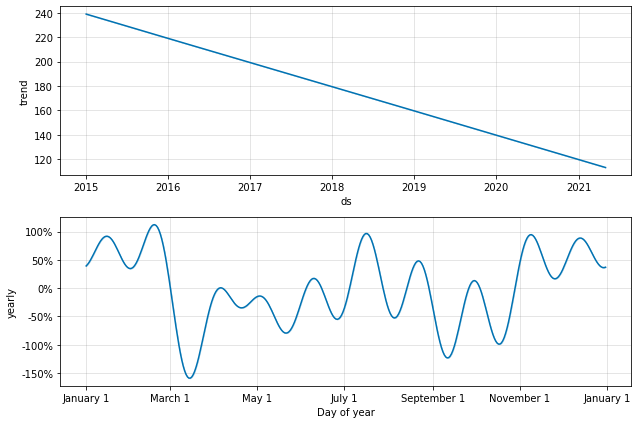

In [0]:
m.plot_components(forecast);

Clearly trend is on the downside

Now lets forecast using deep learning using LSTM,RNN

In [0]:
India_AQI=India_AQI.set_index('ds')

In [0]:
train=India_AQI[:-24]
test=India_AQI[-24:-12]

Scaling data

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

Formatting data

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 24
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

Using TensorFlow backend.


In [0]:
#To give an idea of what generator file holds:
X,y = generator[0]

In [0]:
# We can see that the x array gives the list of values that we are going to predict y of:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.76606002 1.         0.50372626 0.30852832 0.30774907 0.24262397
 0.17586106 0.19605334 0.22674095 0.46158029 0.56459079 0.47485447
 0.54636138 0.44194753 0.36353688 0.29791689 0.22695264 0.21239967
 0.16972153 0.14206495 0.15264551 0.40414151 0.61964574 0.55269174]
Predict this y: 
 [[0.50651424]]


Forming the LSTM model

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [0]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit_generator(generator,epochs=200)

Epoch 1/200
17/17 [==============================] - 1s 43ms/step - loss: 0.1141
Epoch 2/200
17/17 [==============================] - 0s 9ms/step - loss: 0.0648
Epoch 3/200
17/17 [==============================] - 0s 10ms/step - loss: 0.0329
Epoch 4/200
17/17 [==============================] - 0s 10ms/step - loss: 0.0366
Epoch 5/200
17/17 [==============================] - 0s 11ms/step - loss: 0.0336
Epoch 6/200
17/17 [==============================] - 0s 10ms/step - loss: 0.0329
Epoch 7/200
17/17 [==============================] - 0s 11ms/step - loss: 0.0313
Epoch 8/200
17/17 [==============================] - 0s 11ms/step - loss: 0.0321
Epoch 9/200
17/17 [==============================] - 0s 11ms/step - loss: 0.0315
Epoch 10/200
17/17 [==============================] - 0s 10ms/step - loss: 0.0333
Epoch 11/200
17/17 [==============================] - 0s 10ms/step - loss: 0.0312
Epoch 12/200
17/17 [==============================] - 0s 9ms/step - loss: 0.0296
Epoch 13/200
17/17 [=======

Plotting the loss

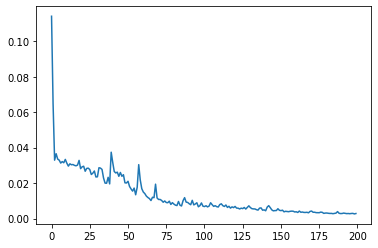

In [0]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [0]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    
    
    test_predictions.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [0]:
true_predictions = scaler.inverse_transform(test_predictions)

In [0]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



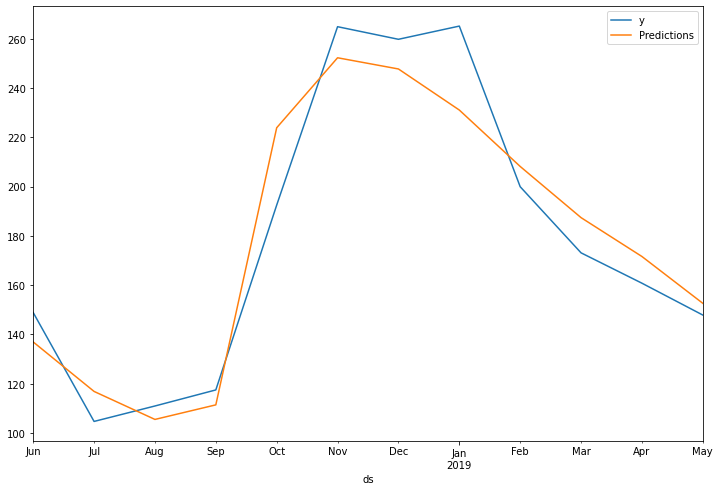

In [0]:
test.plot(figsize=(12,8))
plt.plot(true_predictions)

In [0]:
RMSE=np.sqrt(mean_squared_error(test['y'],test['Predictions']))
print('RMSE = ',RMSE)
print('India_AQI=',India_AQI['y'].mean())

RMSE =  16.370820649533652
India_AQI= 188.32307331319683


Forecasting with RNN

In [0]:
scaler.fit(India_AQI)
scaled_India_AQI=scaler.transform(India_AQI)

In [0]:
generator = TimeseriesGenerator(scaled_India_AQI, scaled_India_AQI, length=n_input, batch_size=1)

In [0]:
model.fit_generator(generator,epochs=250)

Epoch 1/250
41/41 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 2/250
41/41 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 3/250
41/41 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 4/250
41/41 [==============================] - 0s 9ms/step - loss: 0.0058
Epoch 5/250
41/41 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 6/250
41/41 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 7/250
41/41 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 8/250
41/41 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 9/250
41/41 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 10/250
41/41 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 11/250
41/41 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 12/250
41/41 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 13/250
41/41 [=============

In [0]:
test_predictions = []

first_eval_batch = scaled_India_AQI[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    
    
    test_predictions.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [0]:
true_predictions = scaler.inverse_transform(test_predictions)

In [0]:
true_predictions=true_predictions.flatten()

In [0]:
true_preds=pd.DataFrame(true_predictions,columns=['Forecast'])
true_preds=true_preds.set_index(pd.date_range('2020-06-01',periods=12,freq='MS'))

In [0]:
true_preds

,Forecast
2020-06-01,80.423996
2020-07-01,77.103314
2020-08-01,74.019906
2020-09-01,67.555448
2020-10-01,62.487108
2020-11-01,82.894801
2020-12-01,63.007698
2021-01-01,48.415523
2021-02-01,10.436885
2021-03-01,-10.493219


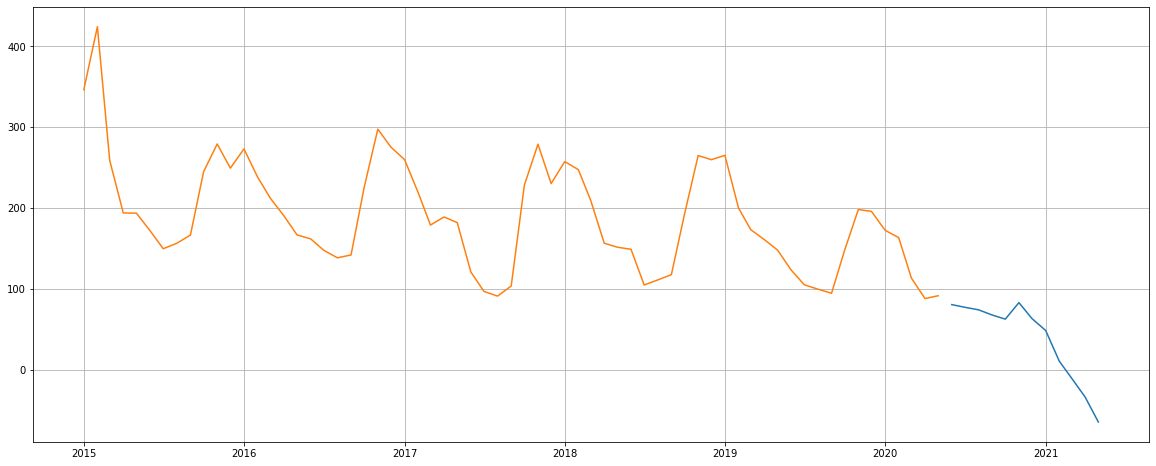

In [0]:
plt.figure(figsize=(20,8))
plt.grid(True)
plt.plot( true_preds['Forecast'])
plt.plot( India_AQI['y'])